In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

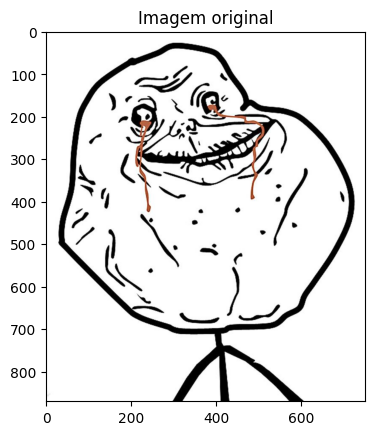

In [6]:
image = cv2.imread("./imgs/forever-alone.jpg")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

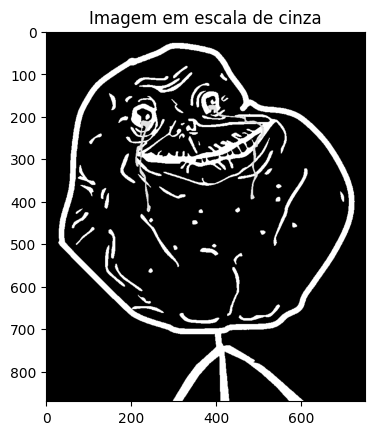

In [7]:
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
plt.imshow(bw , cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

In [14]:
def expansion(BW_img,kernel):
    # Create a new image with the same size of the original
    img_shape = BW_img.shape
    # Create a new image with the same size of the original
    new_img = np.zeros(img_shape)
    # Get the size of the kernel
    kernel_shape = kernel.shape
    # Get the center of the kernel
    centers = [int((kernel_shape[0]-1)/2),int((kernel_shape[1]-1)/2)]
    centerx = centers[0]
    centery = centers[1]
    # Iterate over the image
    for x in range( centerx,img_shape[0] - centerx):
        for y in range(centery,img_shape[1] - centery):
            # Iterate over the kernel
            slice_img = BW_img[x-centery:x+centery+1,y-centery:y+centery+1]
            # check if any pixel in the slice matches the kernel
            does_match = (kernel * slice_img).sum() > 0
            if(does_match):
                new_img[x,y] = 255
    return new_img

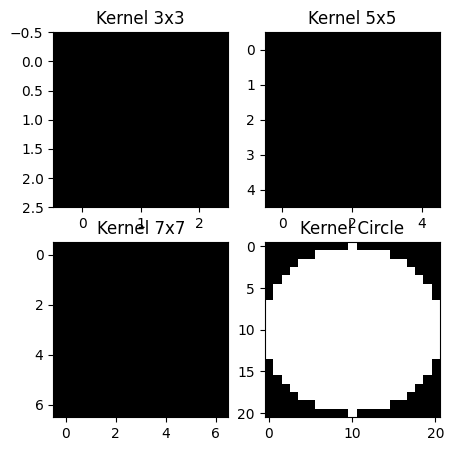

In [17]:
kernel3 = np.ones((3,3), np.uint8)
kernel5 = np.ones((5,5), np.uint8)
kernel7 = np.ones((7,7), np.uint8)
kernelcircle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))

axes,fig = plt.subplots(2,2,figsize=(5,5))
fig[0][0].imshow(kernel3,cmap="gray")
fig[0][0].set_title("Kernel 3x3")
fig[0][1].imshow(kernel5,cmap="gray")
fig[0][1].set_title("Kernel 5x5")
fig[1][0].imshow(kernel7,cmap="gray")
fig[1][0].set_title("Kernel 7x7")
fig[1][1].imshow(kernelcircle,cmap="gray")
fig[1][1].set_title("Kernel Circle")
plt.show()

In [18]:
dilation3 = expansion(bw,kernel3)
dilation5 = expansion(bw,kernel5)
dilation7 = expansion(bw,kernel7)
dilationcircle = expansion(bw,kernelcircle)

dilation3x3 = expansion(dilation3,kernel3)
dilation3x3 = expansion(dilation3x3,kernel3)

dilation5x3 = expansion(dilation5,kernel5)
dilation5x3 = expansion(dilation5x3,kernel5)

dilation3_5 = expansion(dilation3,kernel5)

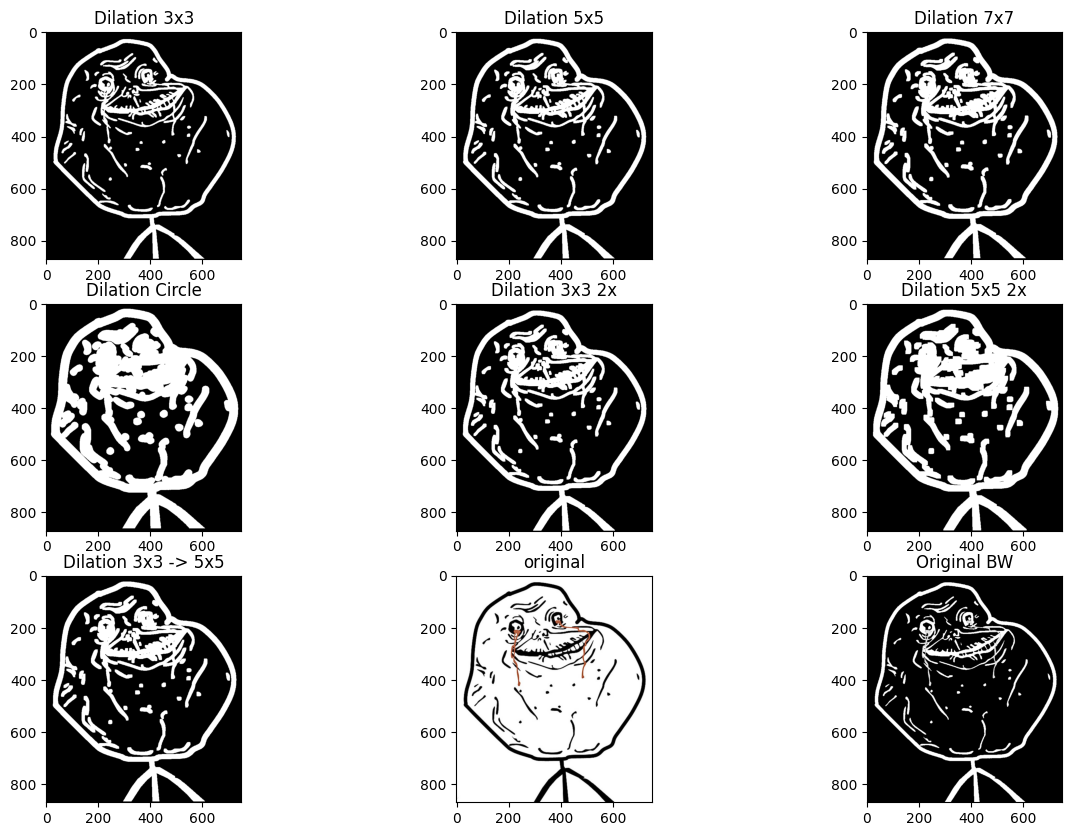

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs[0][0].imshow(dilation3,cmap="gray")
axs[0][0].set_title("Dilation 3x3")
axs[0][1].imshow(dilation5,cmap="gray")
axs[0][1].set_title("Dilation 5x5")
axs[0][2].imshow(dilation7,cmap="gray")
axs[0][2].set_title("Dilation 7x7")
axs[1][0].imshow(dilationcircle,cmap="gray")
axs[1][0].set_title("Dilation Circle")
axs[1][1].imshow(dilation3x3,cmap="gray")
axs[1][1].set_title("Dilation 3x3 2x")
axs[1][2].imshow(dilation5x3,cmap="gray")
axs[1][2].set_title("Dilation 5x5 2x")
axs[2][0].imshow(dilation3_5,cmap="gray")
axs[2][0].set_title("Dilation 3x3 -> 5x5")
axs[2][1].imshow(image,cmap="gray")
axs[2][1].set_title("original")
axs[2][2].imshow(bw,cmap="gray")
axs[2][2].set_title("Original BW")
plt.show()